In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
a = sys.path.append('../modules/')

In [2]:
import auxiliars, prism, sphere, sphere_teste

## Etapa 1: Definicão das coordenadas de Observação:

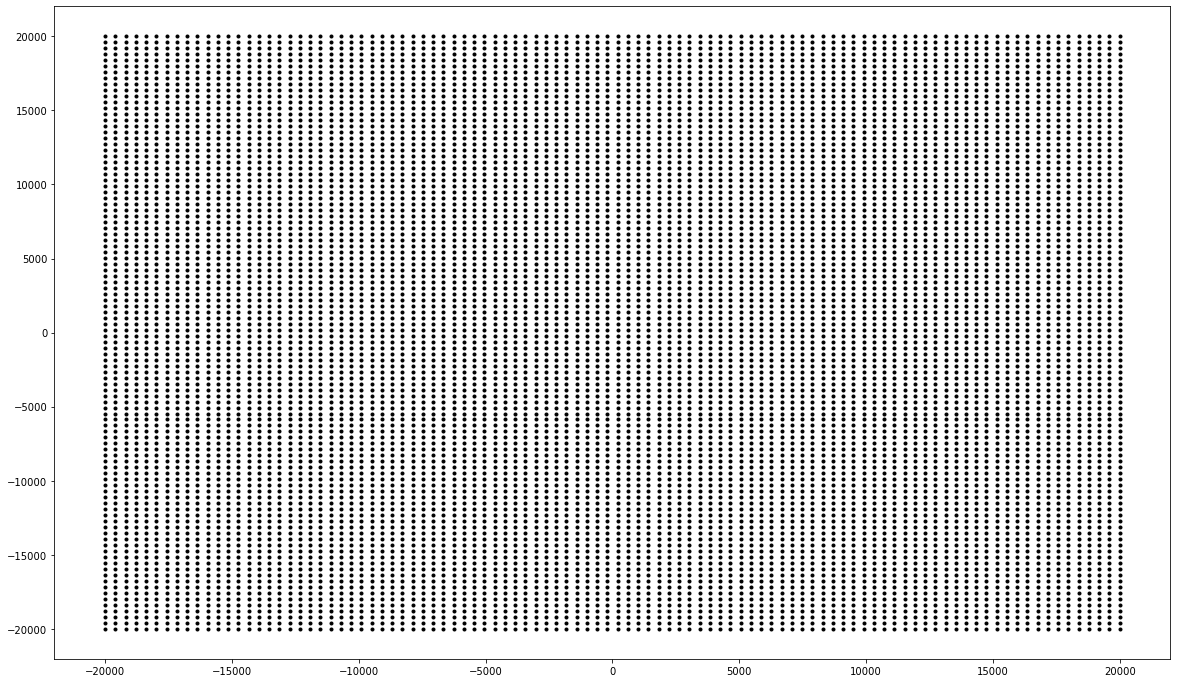

In [3]:
nx = 100 # numero de pontos em x e ....
ny = 100 # ... em y
shape = (nx,ny) 
x = np.linspace(-20000.0, +20000.0, nx) # coordenada x em metros
y = np.linspace(-20000.0, +20000.0, ny) # coordenada y em metros
z = -200.0 # coordenada z em metros

# Ploting all results 
plt.close('all')
plt.figure(figsize=(20,12))
X,Y = np.meshgrid(x,y) # grid de observacoes
plt.plot(X,Y,'.k')
plt.show()

## Etapa 2: Simulação do campo Principal na região das observações:

In [4]:
I = 50.03    # inclinacao do campo principal em graus
D = -7.70      # declinacao do campo principal em graus
Fi = 46800.0 # Intensidade do campo principal (nT)

# Campo principal variando com as posicao F(X,Y):
F = Fi + 0.05*X + 0.08*Y # nT

# Calculo das componentes cartesianas do versor F:

# conversao de graus para radiandos:
incl = np.deg2rad(I)
decl = np.deg2rad(D)
#-----------------------------------
Fx = np.cos(incl)*np.cos(decl)
Fy = np.cos(incl)*np.sin(decl)
Fz = np.sin(incl)

## Etapa 3: Definição das propriedades da fonte crustal (esfera, dipolo):

In [5]:
# localizacao no espaco (sistema cartesiano):
xc = 0.0
yc = 0.0
zc = 1000.0
Mi  = 10.0 # intensidade da magnetizacao em A/m
raio = 1000.0 # m

inc = 28.0 # inclinacao do momento de dipolo
dec = -22.0 # declinacao do momento de dipolo

# criacao de uma lista com todas as propriedades do dipolo:
dipolo = [xc, yc, zc, raio]
print (dipolo)

[0.0, 0.0, 1000.0, 1000.0]


# Calculo da Anomalia de Campo Total exata:

In [6]:
#Calculo do Campo total
bx = sphere.sphere_bx(X, Y, z, dipolo, raio, Mi, inc, dec)
by = sphere.sphere_by(X, Y, z, dipolo, raio, Mi, inc, dec)
bz = sphere.sphere_bz(X, Y, z, dipolo, raio, Mi, inc, dec)


41887902047.863914


In [7]:
CT =  np.sqrt((F*Fx + bx)**2 + (F*Fy + by)**2 + (F*Fz + bz)**2)
ACT = CT - F

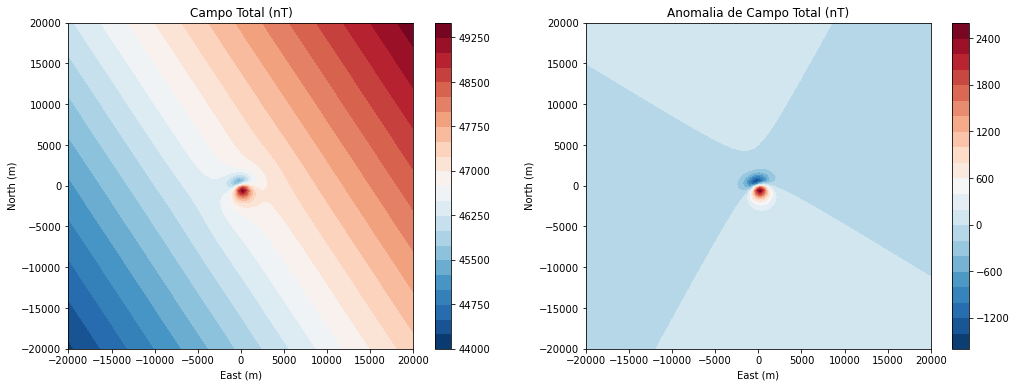

In [8]:
# graficos
plt.close('all')
plt.figure(figsize=(17,6))
#******************************************************
plt.subplot(1,2,1)
plt.contourf(Y, X, CT, 20, cmap = plt.cm.RdBu_r)
plt.title('Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#******************************************************
plt.subplot(1,2,2)
plt.contourf(Y, X, ACT, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#plt.savefig('teste_cenario_1.png', format='png')
#******************************************************
plt.show()

In [9]:
tfa = sphere.sphere_tfa(X, Y, z, dipolo, raio, Mi, I, D, inc, dec)

41887902047.863914


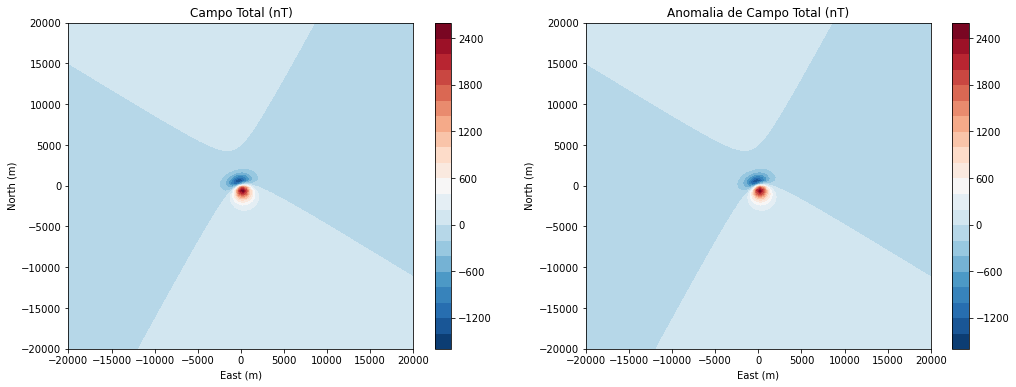

In [10]:
# graficos
plt.close('all')
plt.figure(figsize=(17,6))
#******************************************************
plt.subplot(1,2,1)
plt.contourf(Y, X, ACT, 20, cmap = plt.cm.RdBu_r)
plt.title('Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#******************************************************
plt.subplot(1,2,2)
plt.contourf(Y, X, tfa, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#plt.savefig('teste_cenario_1.png', format='png')
#******************************************************
plt.show()

## Sphere teste

In [11]:
momento = (4.*np.pi*(raio**3)*Mi)/3
print(momento)

41887902047.863914


In [12]:
tfa_teste = sphere_teste.sphere_tfa(X, Y, z, dipolo, momento, I, D, inc, dec)

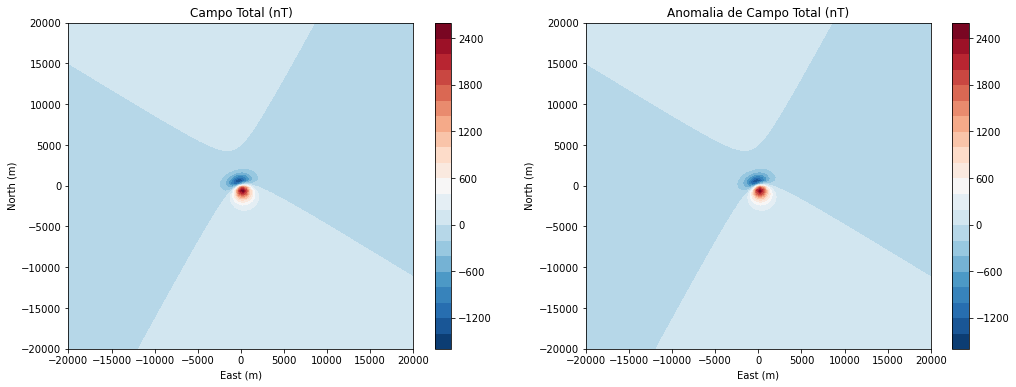

In [13]:
# graficos
plt.close('all')
plt.figure(figsize=(17,6))
#******************************************************
plt.subplot(1,2,1)
plt.contourf(Y, X, ACT, 20, cmap = plt.cm.RdBu_r)
plt.title('Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#******************************************************
plt.subplot(1,2,2)
plt.contourf(Y, X, tfa_teste, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#plt.savefig('teste_cenario_1.png', format='png')
#******************************************************
plt.show()

In [14]:
residuo = tfa - tfa_teste

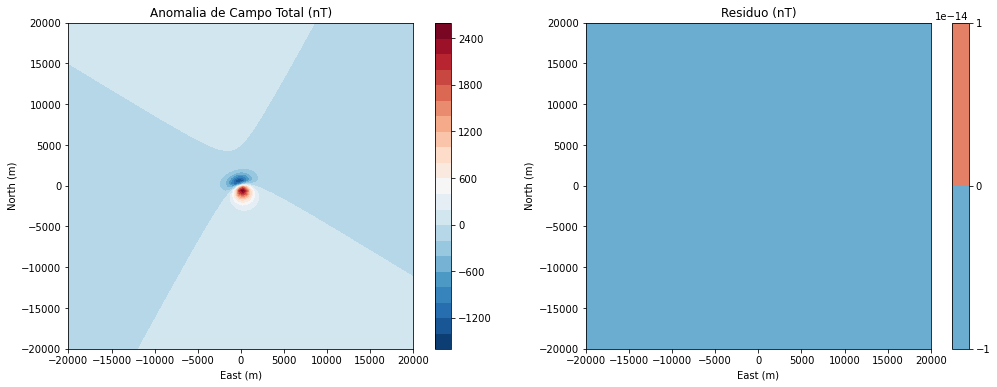

In [16]:
# graficos
plt.close('all')
plt.figure(figsize=(17,6))
#******************************************************
plt.subplot(1,2,1)
plt.contourf(Y, X, tfa_teste, 20, cmap = plt.cm.RdBu_r)
plt.title('Anomalia de Campo Total (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#******************************************************
plt.subplot(1,2,2)
plt.contourf(Y, X, residuo, 20, cmap = plt.cm.RdBu_r)
plt.title('Residuo (nT)', fontsize = 12)
plt.xlabel('East (m)', fontsize = 10)
plt.ylabel('North (m)', fontsize = 10)
plt.colorbar()
#plt.savefig('teste_cenario_1.png', format='png')
#******************************************************
plt.show()